# Importing Modules and Loading Data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import StratifiedKFold

In [2]:
from sklearn.linear_model import LogisticRegression

In [3]:
from sklearn.model_selection import GridSearchCV

In [4]:
from sklearn.svm import SVC

In [5]:
import re

In [6]:
df_st = pd.read_csv('IMDB Dataset.csv')

In [7]:
df_st

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [8]:
df_st['review'] = df_st['review'].str.replace('<br /><br />', '', regex=False)

In [9]:
def remove(text):
    return re.sub(r'\d+', '', text)

df_st['review'] = df_st['review'].apply(remove)

In [10]:
print(df_st.head(25))

                                               review sentiment
0   One of the other reviewers has mentioned that ...  positive
1   A wonderful little production. The filming tec...  positive
2   I thought this was a wonderful way to spend ti...  positive
3   Basically there's a family where a little boy ...  negative
4   Petter Mattei's "Love in the Time of Money" is...  positive
5   Probably my all-time favorite movie, a story o...  positive
6   I sure would like to see a resurrection of a u...  positive
7   This show was an amazing, fresh & innovative i...  negative
8   Encouraged by the positive comments about this...  negative
9   If you like original gut wrenching laughter yo...  positive
10  Phil the Alien is one of those quirky films wh...  negative
11  I saw this movie when I was about  when it cam...  negative
12  So im not a big fan of Boll's work but then ag...  negative
13  The cast played Shakespeare.Shakespeare lost.I...  negative
14  This a fantastic movie of three pris

# Checking Class Distribution

In [11]:
class_distribution = df_st['sentiment'].value_counts()

In [12]:
print("Class Distribution:")
print(class_distribution)

Class Distribution:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [13]:
print(df_st['review'].str.split().apply(len).sum())

11327151


# Training the Model

Split the dataset into features (text) and labels (sentiment)

In [14]:
X = df_st['review']
y = df_st['sentiment']

Applying TF-IDF (Term Frequency-Inverse Document Frequency)

In [15]:
tfidf = TfidfVectorizer(max_features=30000, ngram_range=(1,2), stop_words='english')
X_tfidf = tfidf.fit_transform(X)

In [16]:
print(f"TF-IDF feature matrix shape: {X_tfidf.shape}")

TF-IDF feature matrix shape: (50000, 30000)


In [17]:
print(f"Top 10 words: {tfidf.get_feature_names_out()[:100]}")

Top 10 words: ['aaliyah' 'aamir' 'aamir khan' 'aardman' 'aaron' 'aaron carter' 'ab'
 'abandon' 'abandoned' 'abandoning' 'abandonment' 'abandons' 'abba'
 'abbey' 'abbot' 'abbott' 'abbott costello' 'abby' 'abc' 'abducted'
 'abduction' 'abe' 'abel' 'abhay' 'abiding' 'abigail' 'abilities'
 'ability' 'ability make' 'able' 'able capture' 'able enjoy' 'able look'
 'able make' 'able pull' 'able relate' 'able sit' 'able understand'
 'able watch' 'ably' 'abnormal' 'aboard' 'abominable' 'abomination'
 'aboriginal' 'aborted' 'abortion' 'abound' 'abounds' 'abraham'
 'abraham lincoln' 'abrasive' 'abroad' 'abrupt' 'abruptly' 'absence'
 'absent' 'absolute' 'absolute favorite' 'absolute worst' 'absolutely'
 'absolutely amazing' 'absolutely awful' 'absolutely beautiful'
 'absolutely brilliant' 'absolutely fantastic' 'absolutely hilarious'
 'absolutely horrible' 'absolutely idea' 'absolutely love'
 'absolutely loved' 'absolutely perfect' 'absolutely reason'
 'absolutely ridiculous' 'absolutely sense' 'ab

Spliting (80% training, 20% testing)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

Model: Naive Bayes

In [19]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

Prediction

In [20]:
y_pred = model.predict(X_test)

# Evaluation of Model Performance

In [21]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8757
              precision    recall  f1-score   support

    negative       0.89      0.86      0.87      5000
    positive       0.87      0.89      0.88      5000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



Cross-Validation (StratifiedKFold for balanced splits)

In [22]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_tfidf, y, cv=skf, scoring='accuracy')

In [23]:
print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean()}")

Cross-validation accuracy scores: [0.8691 0.8802 0.8741 0.8679 0.8768]
Mean cross-validation accuracy: 0.8736200000000001


Hyperparameter Tuning

In [24]:
params = {'alpha': [0.5, 1, 2]}
grid_search = GridSearchCV(MultinomialNB(), param_grid=params, cv=5)
grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

Best parameters: {'alpha': 0.5}
Best cross-validation score: 0.8710749999999999


# Improving Model Performance

Trying Different Model

Logistic Regression:

In [26]:
model_LR = LogisticRegression(max_iter=1000)
model_LR.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Prediction

In [27]:
y_pred_LR = model_LR.predict(X_test)

Evaluation

In [28]:
print(f"Accuracy: {accuracy_score(y_test, y_pred_LR)}")
print(classification_report(y_test, y_pred_LR))

Accuracy: 0.9025
              precision    recall  f1-score   support

    negative       0.91      0.89      0.90      5000
    positive       0.90      0.91      0.90      5000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



Cross-Validation

In [29]:
skf_LR = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_LR = cross_val_score(model_LR, X_tfidf, y, cv=skf_LR, scoring='accuracy')

In [30]:
print(f"Cross-validation accuracy scores: {cv_scores_LR}")
print(f"Mean cross-validation accuracy: {cv_scores_LR.mean()}")

Cross-validation accuracy scores: [0.8988 0.9007 0.8976 0.8949 0.898 ]
Mean cross-validation accuracy: 0.8979999999999999


Verify that model is not overfitting by comparing training and test accuracy.

In [31]:
train_accuracy = model_LR.score(X_train, y_train)
test_accuracy = model_LR.score(X_test, y_test)
print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Training Accuracy: 0.934725
Test Accuracy: 0.9025


Model: Support Vector Classifier

In [36]:
model_SVC = SVC(C=0.1, kernel='linear')
model_SVC.fit(X_train, y_train)

SVC(C=0.1, kernel='linear')

Prediction

In [37]:
y_pred_SVC = model_SVC.predict(X_test)

Evaluation

In [38]:
print(f"Accuracy: {accuracy_score(y_test, y_pred_SVC)}")
print(classification_report(y_test, y_pred_SVC))

Accuracy: 0.888
              precision    recall  f1-score   support

    negative       0.91      0.86      0.89      5000
    positive       0.87      0.91      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



Cross-Validation

In [ ]:
skf_SVC = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_SVC = cross_val_score(model_SVC, X_tfidf, y, cv=skf_SVC, scoring='accuracy')

In [ ]:
print(f"Cross-validation accuracy scores: {cv_scores_SVC}")
print(f"Mean cross-validation accuracy: {cv_scores_SVC.mean()}")

In [39]:
train_accuracy_SVC = model_SVC.score(X_train, y_train)
test_accuracy_SVC = model_SVC.score(X_test, y_test)
print(f"Training Accuracy: {train_accuracy_SVC}")
print(f"Test Accuracy: {test_accuracy_SVC}")

Training Accuracy: 0.906525
Test Accuracy: 0.888


Before applying Tune Regularization Parameter( it shows overfitting ):

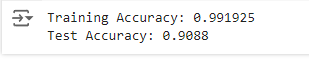

# Saving model and TF-IDF Vectorizer

In [ ]:
import joblib

joblib.dump(model_LR, 'sentiment_model.pkl')

joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']